In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List
import random

c:\Users\erics\Desktop\ETON\STUDIES\2_PYTHON\Notebooks\LangGraph\.venv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [5]:
class AgentState(TypedDict):
    name: str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    correct_answer: int

In [13]:
def setup(state:AgentState) -> AgentState:
    state["lower_bound"] = 1
    state["upper_bound"] = 20
    state["guesses"] = []
    state["attempts"] = 0
    state["correct_answer"] = random.randint(state["lower_bound"], state["upper_bound"])
    
    return state

In [14]:


def guess(state:AgentState) -> AgentState:
    random_number = random.randint(state["lower_bound"], state["upper_bound"])
    state["attempts"] += 1
    state["guesses"].append(random_number)

    return state


In [ ]:
def hint(state:AgentState) -> AgentState:
    guess = state["guesses"][len(state["guesses"]) - 1]

    if guess >= state["correct_answer"]:
        state["upper_bound"] = guess

    elif guess <= state["correct_answer"]:
        state["lower_bound"] = guess
    
    return state

    

In [59]:
def should_continue(state:AgentState) -> AgentState:

    if state["guesses"][len(state["guesses"]) - 1] == state["correct_answer"]:
        return "exit"
    else:
        if state["attempts"] < 7:
            return "continue"
        else: 
            return "exit"


In [60]:
graph = StateGraph(AgentState)

graph.add_node("setup_node", setup)
graph.add_node("guess_node", guess)
graph.add_node("hint_node", hint)
graph.add_edge(START, "setup_node")
graph.add_edge("setup_node", "guess_node")
graph.add_edge("guess_node", "hint_node")

graph.add_conditional_edges(
    "hint_node",
    should_continue,
    {
        "continue": "guess_node",
        "exit": END
    }
)

app = graph.compile()

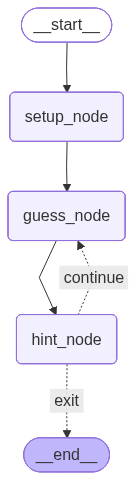

In [61]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [76]:
initial_state = AgentState(name="Ericson")
app.invoke(initial_state)

{'name': 'Ericson',
 'guesses': [1, 16, 13, 7, 5, 3, 4],
 'attempts': 7,
 'lower_bound': 3,
 'upper_bound': 5,
 'correct_answer': 4}